Problem set 4: Visualization

Due: 11:59pm on Friday, September 29 by uploading to Brightspace

Your name:

Use any of the following datasets to create the visualizations that follow. There may be data cleaning and pre-processing that has to happen first. That should occur in a separate code chunk before the visualizations.

* [NOAA](https://www.ncei.noaa.gov/products) weather and climate data
* [World Happiness Report](https://worldhappiness.report/ed/2021/#appendices-and-data)
* [NASA data](https://data.nasa.gov/)
* [US Census data](https://data.census.gov/)
* [WHO COVID data](https://covid19.who.int/)
* [Netflix data](https://www.kaggle.com/datasets/ashishgup/netflix-rotten-tomatoes-metacritic-imdb)
* [Nashville open data](https://data.nashville.gov/)
* [Yelp reviews data](https://www.yelp.com/dataset)

In [2]:
# Data cleaning and pre-processing
# Read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from itertools import combinations
from pandas.plotting import scatter_matrix
df = pd.read_excel('./WHR21_Data_Mortality.xlsx')

# Do some investigative EDA to identify the structure of the data and its content. Then write a brief summary of the dataset in your own words.
print(df.info())

# Rename columns for easier access
df = df.rename(columns={
    "Country name": "country_name",
    "Population 2020": "population_2020",
    "Population 2019": "population_2019",
    "COVID-19 deaths per 100,000 population in 2020": "covid19_deaths_per_100k_2020",
    "Median age": "median_age",
    "Island": "island",
    "Index of exposure to COVID-19  infections in other countries as of March 31": "exposure_index_march31",
    "Log of average distance to SARS countries": "log_avg_distance_sars_countries",
    "WHO Western Pacific Region": "who_western_pacific_region",
    "Female head of government": "female_head_of_government",
    "Index of institutional trust": "institutional_trust_index",
    "Gini coefficient of income": "gini_coefficient",
    "All-cause death count, 2017": "all_cause_deaths_2017",
    "All-cause death count, 2018": "all_cause_deaths_2018",
    "All-cause death count, 2019": "all_cause_deaths_2019",
    "All-cause death count, 2020": "all_cause_deaths_2020",
    "Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average": "excess_deaths_per_100k_2020"
})

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2020                                                              164 non-null    float64
 2   Population 2019                                                              164 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    float64
 4   Median age                                                                   163 non-null    float64
 5   Island                                                                       166 non-null    int64  
 6   Index of exposure to COVID-19  infections 

1. Use the matplotlib and seaborne libraries to create the following visualizations. For each visualization, do the following:
* use generative AI to develop a basic foundational version of the plot
* using static sources, modify that base plot to conform to aesthetic principles we have discussed in class, including changes to colors, labels, sizes, and annotations
* produce an alt-text description of the figure
* produce a caption that would be suitable if the figure appeared in a brief

Label these four components as separate sectons of your code. The first one has been done for you as a template.

A. Scatter Plot: visualize the relationship between two numerical variables. Label the axes appropriately and provide a title for the plot.

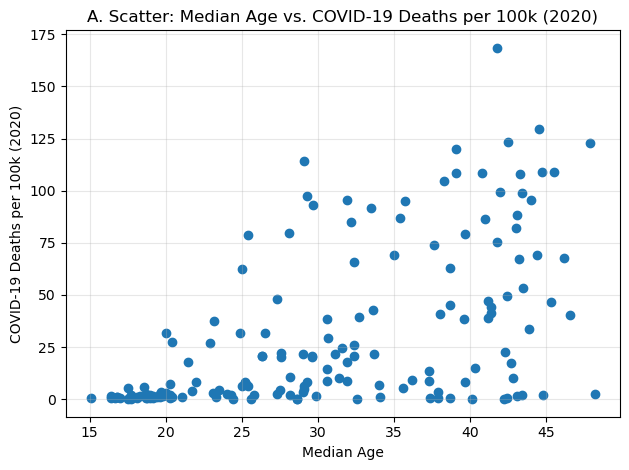

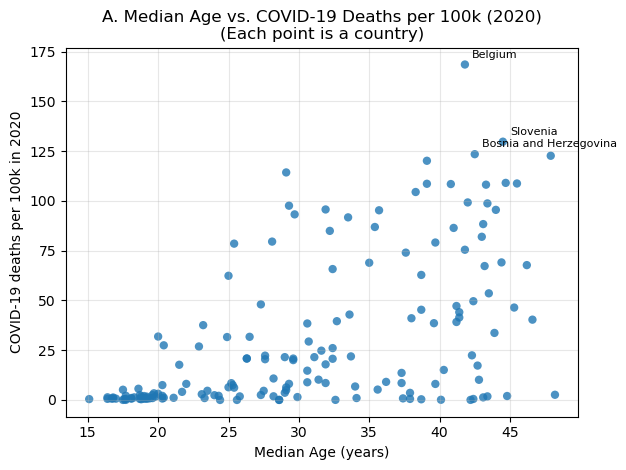

In [ ]:
# Generative AI foundation
def _dropna_xy(x, y):
    m = ~(x.isna() | y.isna())
    return x[m], y[m]
x = df["median_age"]
y = df["covid19_deaths_per_100k_2020"]
x0, y0 = _dropna_xy(x, y)

plt.figure()
plt.scatter(x0, y0)
plt.title("A. Scatter: Median Age vs. COVID-19 Deaths per 100k (2020)")
plt.xlabel("Median Age")
plt.ylabel("COVID-19 Deaths per 100k (2020)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Manual aesthetic improvements
plt.figure()
plt.scatter(x0, y0, s=36, alpha=0.8, edgecolors='none')
# Annotate a few extremes for context
try:
    # Show top-3 by y
    top_idx = y0.nlargest(3).index
    for i in top_idx:
        plt.annotate(df.loc[i, "country_name"], (x0.loc[i], y0.loc[i]), xytext=(5,5), textcoords='offset points', fontsize=8)
except Exception:
    pass
plt.title("A. Median Age vs. COVID-19 Deaths per 100k (2020)\n(Each point is a country)")
plt.xlabel("Median Age (years)")
plt.ylabel("COVID-19 deaths per 100k in 2020")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Alt-text description
# A scatter plot showing the relationship between median age and COVID-19 deaths per 100k population in 2020 for various countries. Each point represents a country, with the top three countries by COVID-19 deaths annotated.

# Caption
# Scatter plot of median age versus COVID-19 deaths per 100k population in 2020. Each point represents a country, with annotations for the top three countries by COVID-19 deaths.

B. Histogram and KDE Plot: generate a histogram and a kernel density estimation (KDE) plot for an appropriate variable. Adjust the number of bins for the histogram to provide a clear representation of the data distribution.


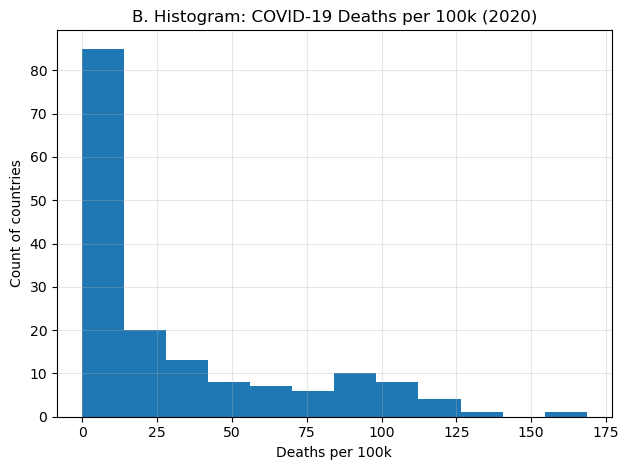

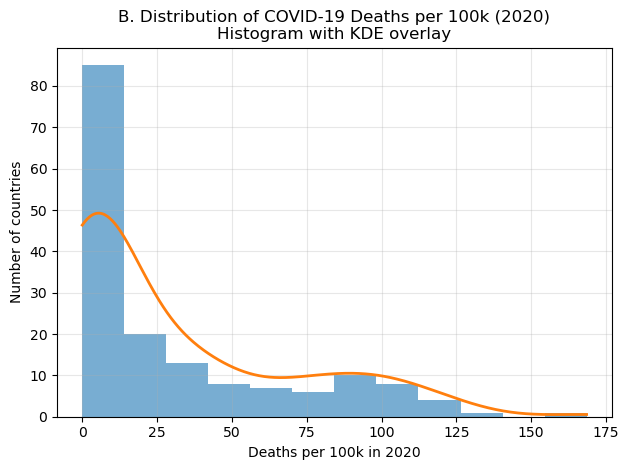

In [9]:
vals = df["covid19_deaths_per_100k_2020"].dropna().astype(float)
bins = int(np.sqrt(len(vals))) if len(vals) > 0 else 10
# Generative AI foundation
plt.figure()
plt.hist(vals, bins=bins)
plt.title("B. Histogram: COVID-19 Deaths per 100k (2020)")
plt.xlabel("Deaths per 100k")
plt.ylabel("Count of countries")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Manual aesthetic improvements
plt.figure()
counts, bin_edges, _ = plt.hist(vals, bins=bins, alpha=0.6)
# KDE
try:
    kde = gaussian_kde(vals)
    xs = np.linspace(vals.min(), vals.max(), 400)
    ys = kde(xs)
    # Scale KDE to histogram counts (area alignment)
    area = np.trapz(ys, xs)
    if area > 0:
        ys_scaled = ys * (counts.sum() * (bin_edges[1]-bin_edges[0])) / area
        plt.plot(xs, ys_scaled, linewidth=2)
except Exception:
    pass
plt.title("B. Distribution of COVID-19 Deaths per 100k (2020)\nHistogram with KDE overlay")
plt.xlabel("Deaths per 100k in 2020")
plt.ylabel("Number of countries")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Alt-text description
# A histogram showing the distribution of COVID-19 deaths per 100k population in 2020 across various countries, with a kernel density estimate (KDE) overlay.

# Caption
# Histogram and KDE of COVID-19 deaths per 100k population in 2020, illustrating the distribution across countries.

C. Box Plot with Grouping: create a box plot to compare the distribution of a numeric variable among different levels of a factor variable

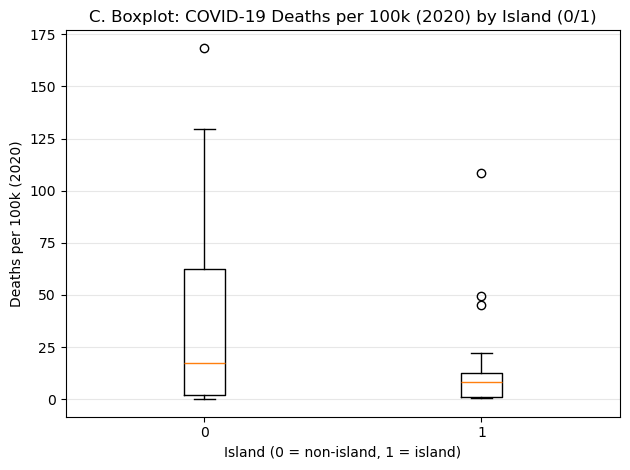

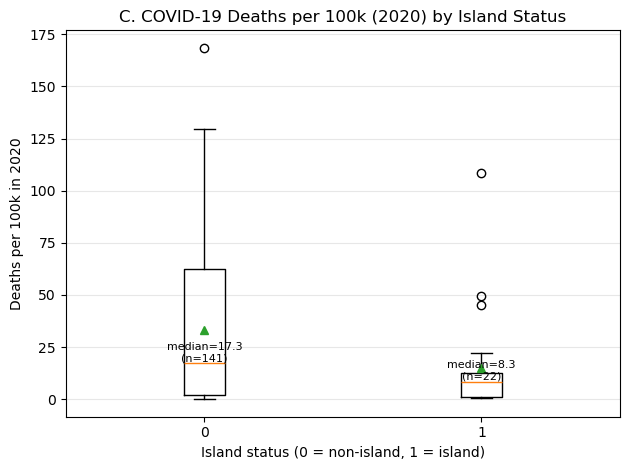

In [ ]:
# Generative AI foundation
group_col = "island"
metric_col = "covid19_deaths_per_100k_2020"
data_c = df[[group_col, metric_col]].dropna()
groups = sorted(data_c[group_col].unique())

plt.figure()
plt.boxplot([data_c.loc[data_c[group_col] == g, metric_col] for g in groups], labels=[str(int(g)) for g in groups])
plt.title("C. Boxplot: COVID-19 Deaths per 100k (2020) by Island (0/1)")
plt.xlabel("Island (0 = non-island, 1 = island)")
plt.ylabel("Deaths per 100k (2020)")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Manual aesthetic improvements
plt.figure()
bp = plt.boxplot([data_c.loc[data_c[group_col] == g, metric_col] for g in groups], labels=[str(int(g)) for g in groups], showmeans=True)
plt.title("C. COVID-19 Deaths per 100k (2020) by Island Status")
plt.xlabel("Island status (0 = non-island, 1 = island)")
plt.ylabel("Deaths per 100k in 2020")
for i, g in enumerate(groups, start=1):
    vals_g = data_c.loc[data_c[group_col] == g, metric_col].values
    if len(vals_g) > 0:
        median_g = np.median(vals_g)
        plt.text(i, median_g, f"median={median_g:.1f}\n(n={len(vals_g)})", ha='center', va='bottom', fontsize=8)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Alt-text description
# Box plots comparing COVID-19 deaths per 100,000 in 2020 between non-island (0) and island (1) countries, with sample sizes and medians annotated.

# Caption
# Box plots comparing COVID-19 deaths per 100k population in 2020 between non-island and island countries, with annotations for sample sizes and medians.

D. Pairwise Scatter Plots: generate a matrix of scatter plots to visualize pairwise relationships between numerical columns in the dataset. This should result in a grid of scatter plots with each plot showing the relationship between two columns.

<Figure size 640x480 with 0 Axes>

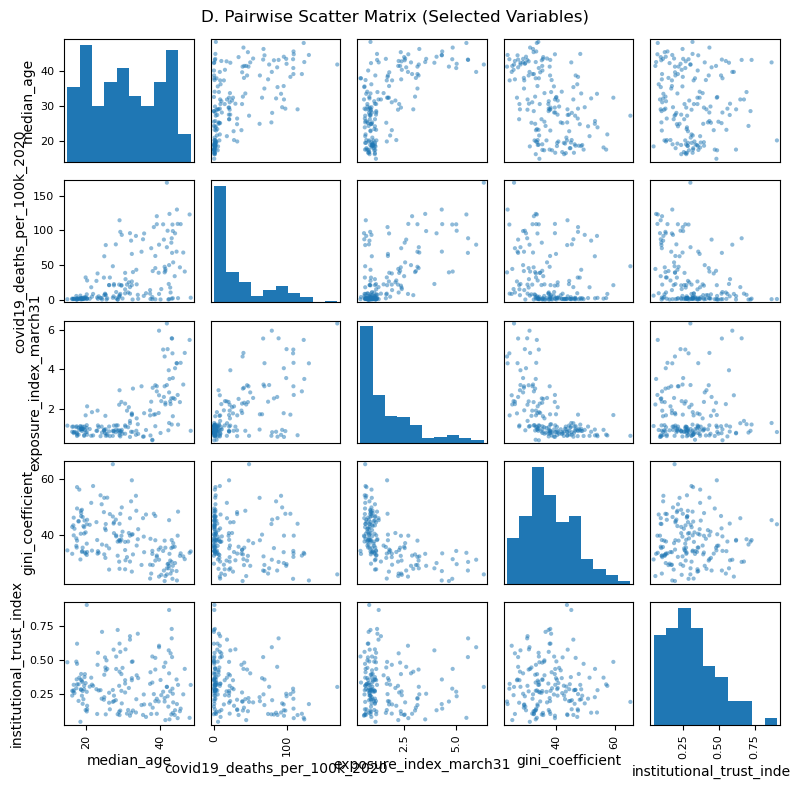

C:\temp\ipykernel_22560\1266344530.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


<Figure size 640x480 with 0 Axes>

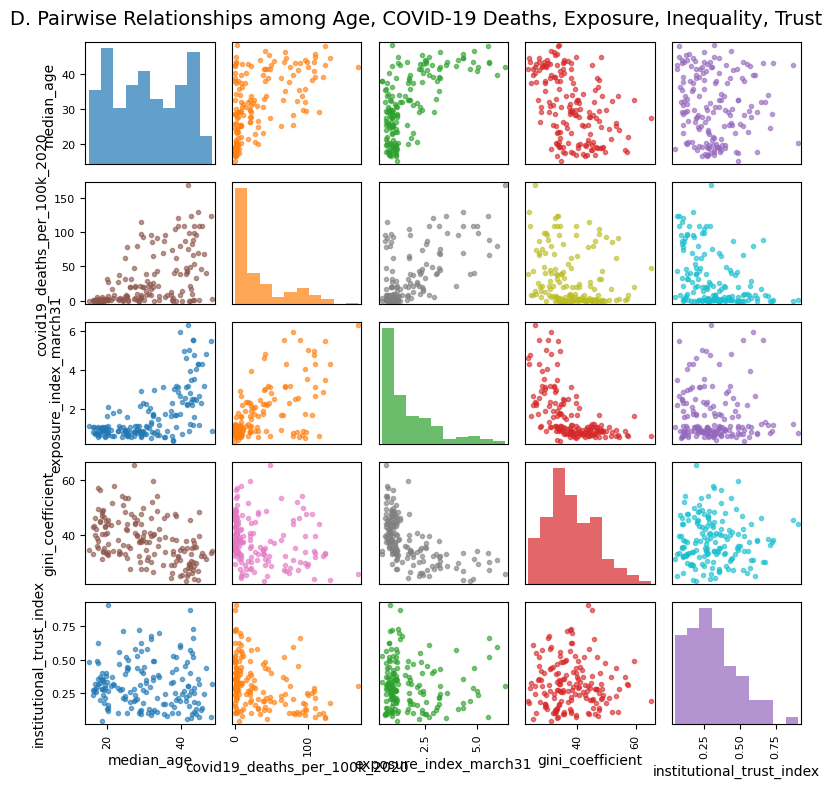

In [15]:
# Generative AI foundation
num_cols = [
    "median_age",
    "covid19_deaths_per_100k_2020",
    "exposure_index_march31",
    "gini_coefficient",
    "institutional_trust_index"
]
num_cols = [c for c in num_cols if c in df.columns]
data_d = df[num_cols].dropna()
plt.figure()
# pandas scatter_matrix returns its own Figure; create directly
axes = scatter_matrix(data_d, figsize=(8, 8), diagonal='hist')
plt.suptitle("D. Pairwise Scatter Matrix (Selected Variables)")
plt.tight_layout()
plt.show()

# Manual aesthetic improvements
import matplotlib.cm as cm

plt.figure()
axes = scatter_matrix(data_d, figsize=(8, 8), diagonal='hist', range_padding=0.05)

# Use a colormap for scatter points by variable pair
cmap = cm.get_cmap('tab10')
n = len(num_cols)
for i in range(n):
    for j in range(n):
        if i != j:
            color = cmap((i * n + j) % cmap.N)
            artists = axes[i, j].collections
            for artist in artists:
                try:
                    artist.set_alpha(0.6)
                    artist.set_color(color)
                except Exception:
                    pass
        else:
            # Color histograms on diagonal
            for patch in axes[i, j].patches:
                patch.set_facecolor(cmap(i % cmap.N))
                patch.set_alpha(0.7)

# Set titles and adjust layout
plt.suptitle("D. Pairwise Relationships among Age, COVID-19 Deaths, Exposure, Inequality, Trust", fontsize=14)
plt.tight_layout()
plt.show()

# Alt-text description
# A grid of scatter plots showing pairwise relationships among median age, COVID-19 deaths per 100k, exposure index, Gini coefficient, and institutional trust, with histograms on the diagonal.

# Caption
# Figure D. Pairwise plots indicate positive associations between median age and COVID-19 mortality, and suggest nuanced patterns between inequality, trust, and mortality.

E. Categorical Variable Bar Plot: create a bar plot to visualize the frequency distribution of a categorical variable. Show the counts of each category on the y-axis and label the bars accordingly.

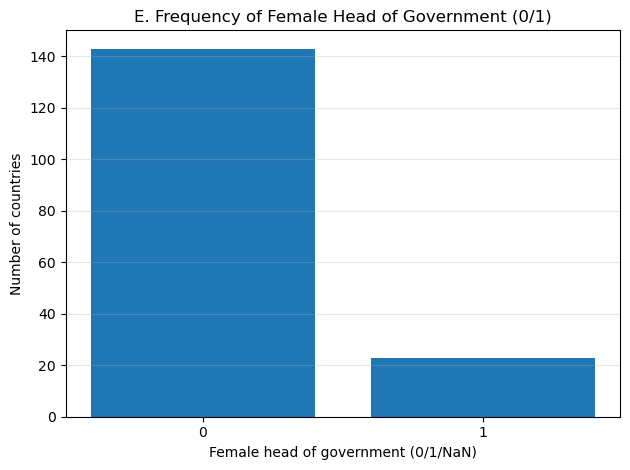

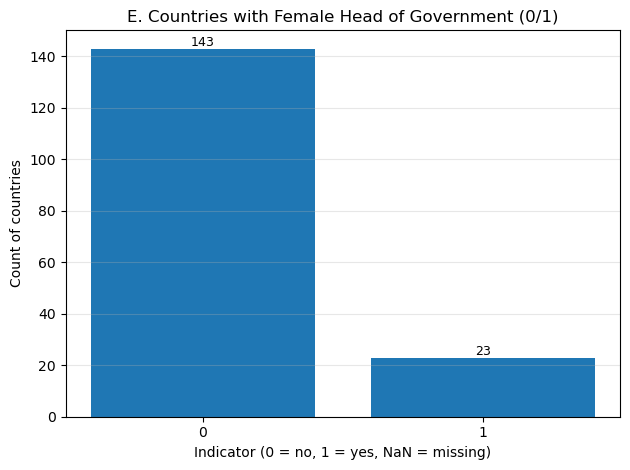

In [ ]:
# Generative AI foundation
cat_col = "female_head_of_government"
counts = df[cat_col].value_counts(dropna=False).sort_index()
labels = [("NaN" if pd.isna(ix) else str(int(ix))) for ix in counts.index]

plt.figure()
plt.bar(range(len(counts)), counts.values)
plt.xticks(range(len(counts)), labels)
plt.title("E. Frequency of Female Head of Government (0/1)")
plt.xlabel("Female head of government (0/1/NaN)")
plt.ylabel("Number of countries")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Manual aesthetic improvements
plt.figure()
bars = plt.bar(range(len(counts)), counts.values)
plt.xticks(range(len(counts)), labels)
plt.title("E. Countries with Female Head of Government (0/1)")
plt.xlabel("Indicator (0 = no, 1 = yes, NaN = missing)")
plt.ylabel("Count of countries")
for i, b in enumerate(bars):
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"{int(h)}", ha='center', va='bottom', fontsize=9)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Alt-text description
# A bar chart showing the frequency of countries with a female head of government, categorized by 0 (no), 1 (yes), and NaN (missing).

# Caption
# Figure E. Frequency of countries with a female head of government, highlighting the count of countries with and without female leaders.


F. Correlation Heatmap: calculate the correlation matrix for numerical columns in the dataset and create a heatmap to visualize the correlations. Use color coding to represent the strength and direction of correlations.

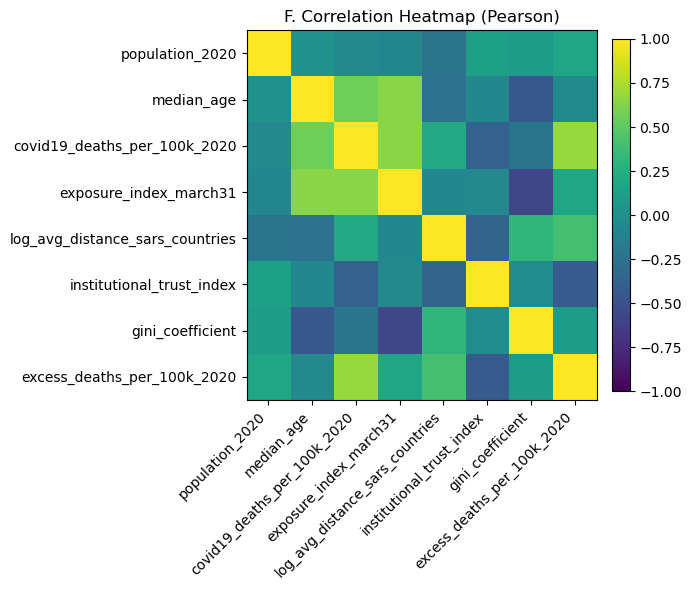

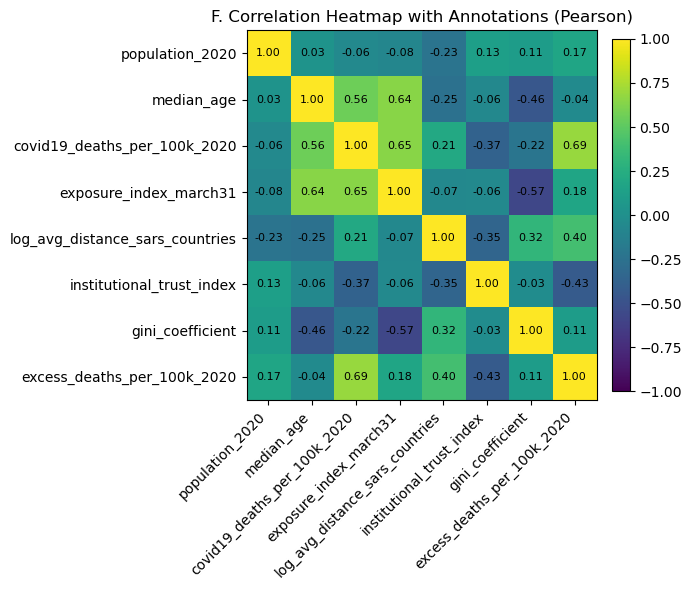

In [ ]:
# Generative AI foundation
corr_cols = [
    "population_2020",
    "median_age",
    "covid19_deaths_per_100k_2020",
    "exposure_index_march31",
    "log_avg_distance_sars_countries",
    "institutional_trust_index",
    "gini_coefficient",
    "excess_deaths_per_100k_2020"
]
corr_cols = [c for c in corr_cols if c in df.columns]
corr_df = df[corr_cols].astype(float)
corr = corr_df.corr(method='pearson', min_periods=30)  # require minimum pairwise obs for stability

plt.figure(figsize=(7, 6))
im = plt.imshow(corr, aspect='auto', vmin=-1, vmax=1)
plt.title("F. Correlation Heatmap (Pearson)")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha='right')
plt.yticks(range(len(corr_cols)), corr_cols)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

# Manual aesthetic improvements
plt.figure(figsize=(7, 6))
im = plt.imshow(corr, aspect='auto', vmin=-1, vmax=1)
plt.title("F. Correlation Heatmap with Annotations (Pearson)")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha='right')
plt.yticks(range(len(corr_cols)), corr_cols)
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        val = corr.iloc[i, j]
        if not np.isnan(val):
            plt.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


# Alt-text description
# A heatmap showing the Pearson correlation coefficients between various socio-economic and health-related variables, with annotations for each cell.

# Caption
# Figure F. Heatmap of Pearson correlation coefficients among socio-economic and health variables, highlighting relationships with COVID-19 mortality.


G. Subplots: create a figure with multiple subplots to display side-by-side histograms grouped by a factor column. Each subplot should represent a different factor level.

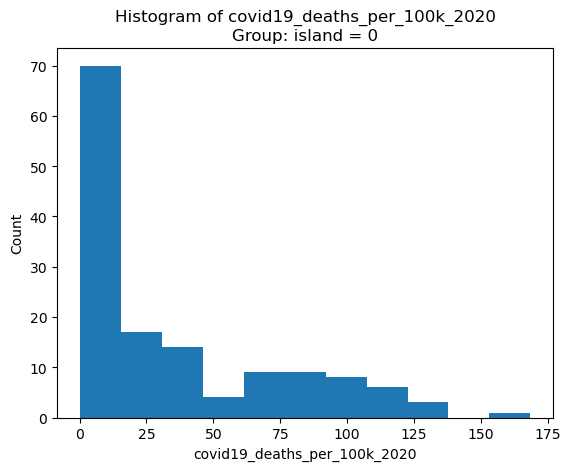

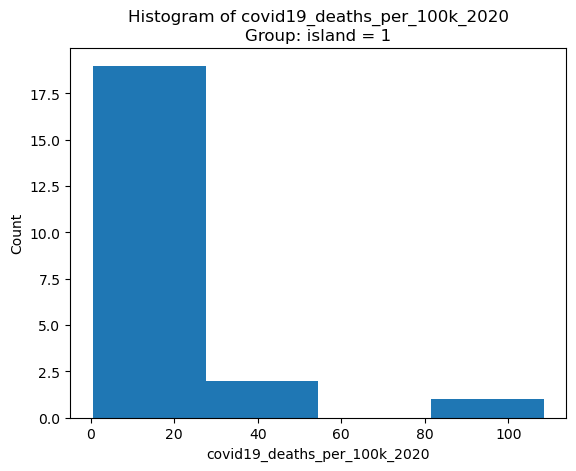

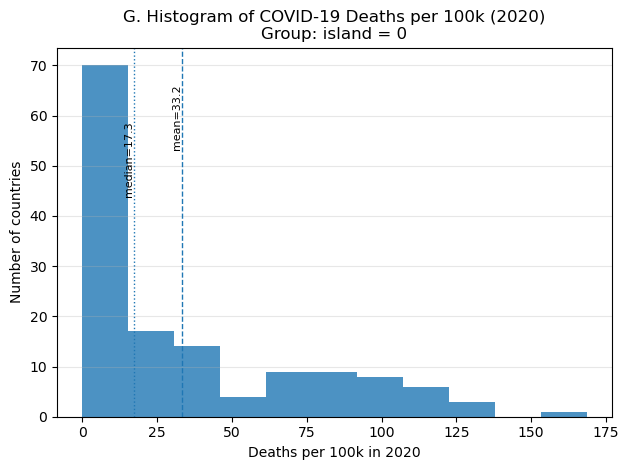

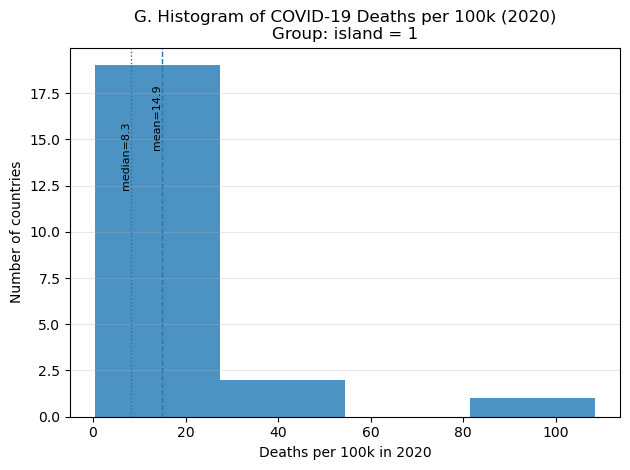

In [ ]:
# Generative AI foundation
factor = "island"
metric = "covid19_deaths_per_100k_2020"
tmp = df[[factor, metric]].dropna()
levels = sorted(tmp[factor].unique())

for lvl in levels:
    vals = tmp.loc[tmp[factor] == lvl, metric].astype(float)
    bins = int(np.sqrt(len(vals))) if len(vals) > 0 else 10
    plt.figure()
    plt.hist(vals, bins=bins)
    plt.title(f"Histogram of {metric}\nGroup: {factor} = {int(lvl)}")
    plt.xlabel(metric)
    plt.ylabel("Count")
    plt.show()

# Manual aesthetic improvements
G_alt_texts = []
G_captions = []
for lvl in levels:
    vals_lvl = tmp.loc[tmp[factor] == lvl, metric].astype(float)
    bins_lvl = int(np.sqrt(len(vals_lvl))) if len(vals_lvl) > 0 else 10
    plt.figure()
    plt.hist(vals_lvl, bins=bins_lvl, alpha=0.8)
    plt.title(f"G. Histogram of COVID-19 Deaths per 100k (2020)\nGroup: island = {int(lvl)}")
    plt.xlabel("Deaths per 100k in 2020")
    plt.ylabel("Number of countries")
    # basic annotation: mean & median
    if len(vals_lvl) > 0:
        mean_v = vals_lvl.mean()
        med_v = vals_lvl.median()
        ymax = plt.gca().get_ylim()[1]
        plt.axvline(mean_v, linestyle='--', linewidth=1)
        plt.text(mean_v, ymax*0.9, f"mean={mean_v:.1f}", rotation=90, va='top', ha='right', fontsize=8)
        plt.axvline(med_v, linestyle=':', linewidth=1)
        plt.text(med_v, ymax*0.8, f"median={med_v:.1f}", rotation=90, va='top', ha='right', fontsize=8)
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
# Alt-text description
# A series of histograms showing the distribution of COVID-19 deaths per 100k population in 2020, separated by island status (0 = no, 1 = yes).

# Caption
# Figure G. Histograms of COVID-19 deaths per 100k population in 2020, categorized by island status.


2. Based on the visualizations you've created, provide three key insights you can draw from the data. These insights could be related to trends, patterns, or anomalies you observed. These insights do not need to cover all your visualizations, and can instead focus on the ones that are most insightful.

- In the scatter A and the pair plot D, countries with higher median age generally sit higher on deaths per 100k. The heatmap F also shows a positive correlation between these two. It’s not a perfect line as some countries are above or below the trend, but the overall direction is hard to miss. My interpretation: age structure is a first-order driver, and any cross-country comparison should control for it.

- The histogram B is heavy on the left and stretches to the right. Most countries cluster at relatively low to moderate deaths per 100k, while a small group pushes far to the right (some above ~120 per 100k). Because of this skew, I would not rely on the mean alone, the median or trimmed mean is more honest for typical experience.

- The grouped boxplot C and the per-group histograms G show island countries have a lower center and tighter spread for deaths per 100k than non-island countries. This pattern fits intuition: physical borders and easier travel controls may reduce exposure. It’s not universal (there are exceptions), but the median gap is visible enough that I would test it formally in a simple two-sample comparison.